<a href="https://colab.research.google.com/github/NguyenVy2k1/ols/blob/main/Breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khai báo biến, thư viện

In [77]:
import matplotlib.pyplot          as plt
import numpy                      as np
import matplotlib.pyplot          as plt
import numpy                      as np
from keras.preprocessing.image    import load_img
from keras.preprocessing.image    import img_to_array
from keras.models                 import load_model
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD

Kết nối Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
x_train = np.zeros((642,200,200,3))
x_test = np.zeros((63,200,200,3))

Gán giá trị cho y_train, y_test

In [43]:
y_train = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
           0,0,0,0,0,0,

           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
           1,1,

           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
           2,2,2,2,2,2,2,2,2,2,2,2,2,2]

y_test = [0,0,0,0,0,0,0,0,0,0,0,
          1,1,1,1,1,1,1,1,1,1,1,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,
          2,2,2,2,2,2,2,2,2,2,2]

Load ảnh

In [45]:
for i in range(125):
  x_train[i] = load_img('/content/drive/MyDrive/data/train/benign'+ 
                        str(i+1) +'.png', target_size=(200,200))
  x_train[i] = img_to_array(x_train[i]) 
  
for i in range(125,207):
  x_train[i] = load_img('/content/drive/MyDrive/data/train/malignant'+ 
                        str(i+1-126) +'.png', target_size=(200,200))
  x_train[i] = img_to_array(x_train[i])  

for i in range(207,621):
  x_train[i] = load_img('/content/drive/MyDrive/data/train/norma'+ 
                        str(i+1-208) +'.png', target_size=(200,200))
  x_train[i] = img_to_array(x_train[i]) 


In [46]:
for i in range(10) :
  x_test[i] = load_img('/content/drive/MyDrive/data/test/benign'+ 
                       str(i+1) +'.png', target_size=(200,200))
  x_test[i] = img_to_array(x_test[i]) 

for i in range(10,21) :
  x_test[i] = load_img('/content/drive/MyDrive/data/test/malignant'+ 
                       str(i+1-11) +'.png', target_size=(200,200))
  x_test[i] = img_to_array(x_test[i]) 

for i in range(21,62):
  x_test[i] = load_img('/content/drive/MyDrive/data/test/norma'+ 
                       str(i+1+978) +'.png', target_size=(200,200))
  x_test[i] = img_to_array(x_test[i]) 

In [48]:
x_train = x_train.reshape(642, 200, 200,3)
x_test  = x_test.reshape(63, 200, 200,3)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = np_utils.to_categorical(y_train,3)
y_test  = np_utils.to_categorical(y_test,3)

Xây dựng Model

In [51]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', input_shape=(200, 200, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu', 
                kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))	
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_93 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_83 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_94 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                     

In [63]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['acc'])
history = model.fit(x_train,y_train,epochs=200,batch_size=32,validation_data=(x_test,y_test),verbose=1)

Epoch 1/200
21/21 [==============================] - 4s 142ms/step - loss: 0.5257 - acc: 0.7928 - val_loss: 0.5654 - val_acc: 0.7937
Epoch 2/200
21/21 [==============================] - 3s 131ms/step - loss: 0.5402 - acc: 0.7773 - val_loss: 0.5906 - val_acc: 0.8095
Epoch 3/200
21/21 [==============================] - 3s 131ms/step - loss: 0.4897 - acc: 0.7991 - val_loss: 0.5810 - val_acc: 0.6984
Epoch 4/200
21/21 [==============================] - 3s 132ms/step - loss: 0.5091 - acc: 0.7960 - val_loss: 0.5792 - val_acc: 0.7937
Epoch 5/200
21/21 [==============================] - 3s 132ms/step - loss: 0.5285 - acc: 0.7570 - val_loss: 29.6297 - val_acc: 0.2698
Epoch 6/200
21/21 [==============================] - 3s 132ms/step - loss: 0.4834 - acc: 0.7913 - val_loss: 0.8093 - val_acc: 0.7460
Epoch 7/200
21/21 [==============================] - 3s 133ms/step - loss: 0.4758 - acc: 0.8069 - val_loss: 0.7027 - val_acc: 0.7778
Epoch 8/200
21/21 [==============================] - 3s 133ms/step -

In [67]:
model.save('Breast_cancer.h5')

Test loss: 0.23732277750968933
Test accuracy: 0.9523809552192688


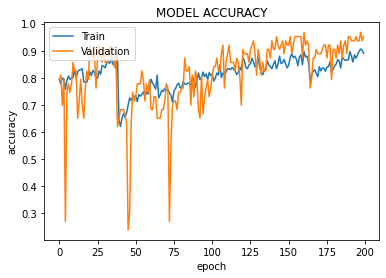

In [65]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MODEL ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.show

score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Chẩn đoán:  Malignant Case


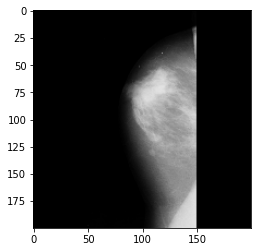

In [78]:
img = load_img('/content/drive/MyDrive/data/test/malignant6.png', target_size=(200, 200))
img = img_to_array(img)
img = img.reshape(1, 200, 200, 3)
img = img.astype('float32')
img = img / 255

model = load_model('Breast_cancer.h5')
plt.imshow(img.reshape(200,200,3), cmap='gray')

result = model.predict(img.reshape(1,200,200,3))
if np.argmax(result) == 0:
   i = "Begnign Case"
elif np.argmax(result) == 1:
   i = "Malignant Case"
elif np.argmax(result) == 2:
   i = "Normal Case"
print('Chẩn đoán: ', i)
plt.show(